In [ ]:
'''
 YR   MON  NINO1+2  ANOM   NINO3    ANOM   NINO4    ANOM   NINO3.4  ANOM
1950   1   23.01   -1.53   23.56   -2.11   26.94   -1.30   24.55   -2.00
1950   2   24.32   -1.70   24.89   -1.52   26.67   -1.43   25.06   -1.68
1950   3   25.11   -1.31   26.36   -0.80   26.52   -1.68   25.87   -1.37
1950   4   23.63   -1.83   26.44   -1.04   26.90   -1.55   26.28   -1.43
1950   5   22.68   -1.59   25.69   -1.47   27.73   -1.01   26.18   -1.63
'''

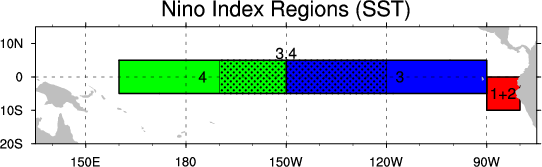

In [1]:
from IPython.display import Image
Image(filename='E:/Documences/py/Dr_Tram/sst.png')

- El Nino: El Nino là khái niệm dùng để chỉ hiện tượng nóng lên không bình thường của lớp nước mặt thuộc vùng biển phía đông xích đạo Thái Bình Dương (TBD), El Nino còn được gọi là "pha nóng".

- La Nina: Ngược với El Nino, La Nina là khái niệm dùng để chỉ hiện tượng lạnh đi không bình thường của lớp nước mặt thuộc vùng biển phía đông xích đạo TBD, La Nina còn được gọi là "pha lạnh".

Read more via: https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

### The numbers of the Niño 1,2,3, and 4 regions correspond with the labels assigned to ship tracks that crossed these regions.  

+ Niño 1+2 (0-10S, 90W-80W):  The Niño 1+2 region is the smallest and eastern-most of the Niño SST regions, and corresponds with the region of coastal South America where El Niño was first recognized by the local populations.  This index tends to have the largest variance of the Niño SST indices.

+ Niño 3 (5N-5S, 150W-90W):  This region was once the primary focus for monitoring and predicting El Niño, but researchers later learned that the key region for coupled ocean-atmosphere interactions for ENSO lies further west (Trenberth, 1997).  Hence, the Niño 3.4 and ONI became favored for defining El Niño and La Niña events.

+ Niño 3.4 (5N-5S, 170W-120W):  The  Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast.  The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La  Niña events are defined when the  Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

+ ONI (5N-5S, 170W-120W): The ONI uses the same region as the Niño 3.4 index.  The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña, the anomalies must exceed +0.5C or -0.5C for at least five consecutive months.  This is the operational definition used by NOAA.

+ Niño 4 (5N-5S, 160E-150W): The  Niño 4 index captures SST anomalies in the central equatorial Pacific.  This region tends to have less variance than the other Niño regions.

In [3]:
#using library
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file = "E:/Documences/py/Dr_Tram/El-nino.txt" 

# for assign year easier
import matplotlib.ticker as ticker


df = pd.read_csv(file, sep="  ", skiprows=1, error_bad_lines=False)   
#try define the column by a shorter name
df.columns = ["x", "y", "y1", "y2", "y3", "y4", "y5", "y6", "y7", "y8"] 

df.head()

#draft code, don't mind
#df.columns = ["YR", "MON", "NINO1+2"]
#df['time']=pd.to_datetime(df.x.astype(str) + '/' + df.y.astype(str) + '/01')
#df.set_index(pd.to_datetime(df[['Year','Month']].assign(day=1)))['y1'] 


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 18: Expected 10 fields in line 18, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 19: Expected 10 fields in line 19, saw 14. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 20: Expected 10 fields in line 20, saw 14. Error could possibly be due to quotes being ignored when a multi-

,x,y,y1,y2,y3,y4,y5,y6,y7,y8
0,1950,2,24.32,-1.70,24.89,-1.52,26.67,-1.43,25.06,-1.68
1,1950,3,25.11,-1.31,26.36,-0.80,26.52,-1.68,25.87,-1.37
2,1950,4,23.63,-1.83,26.44,-1.04,26.90,-1.55,26.28,-1.43
3,1950,5,22.68,-1.59,25.69,-1.47,27.73,-1.01,26.18,-1.63
4,1950,6,21.33,-1.68,25.51,-0.99,28.13,-0.65,26.46,-1.13


In [4]:
#add a time-column to table data
df['time'] = pd.date_range(start='1950-01-01', periods=len(df.index), freq='MS').strftime('%Y-%m')

print(df) 

        x   y     y1    y2     y3    y4     y5    y6     y7    y8     time
0    1950   2  24.32 -1.70  24.89 -1.52  26.67 -1.43  25.06 -1.68  1950-01
1    1950   3  25.11 -1.31  26.36 -0.80  26.52 -1.68  25.87 -1.37  1950-02
2    1950   4  23.63 -1.83  26.44 -1.04  26.90 -1.55  26.28 -1.43  1950-03
3    1950   5  22.68 -1.59  25.69 -1.47  27.73 -1.01  26.18 -1.63  1950-04
4    1950   6  21.33 -1.68  25.51 -0.99  28.13 -0.65  26.46 -1.13  1950-05
..    ...  ..    ...   ...    ...   ...    ...   ...    ...   ...      ...
357  2020   8  19.96 -1.05  24.50 -0.60  28.48 -0.17  26.27 -0.57  1979-10
358  2020   9  19.50 -1.23  23.91 -1.02  28.21 -0.45  25.89 -0.84  1979-11
359  2020  10  20.25 -0.80  23.85 -1.10  27.96 -0.68  25.46 -1.21  1979-12
360  2020  11  20.95 -0.75  23.89 -1.15  27.81 -0.75  25.29 -1.33  1980-01
361  2020  12  22.03 -0.86  24.33 -0.87  27.55 -0.89  25.42 -1.14  1980-02

[362 rows x 11 columns]


In [8]:
#use latex
plt.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10,8)

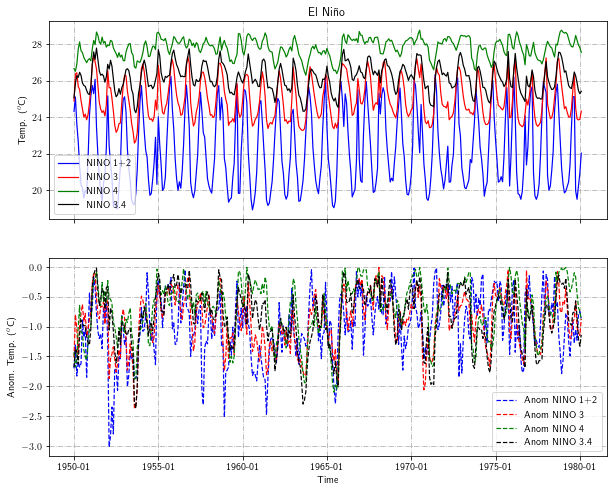

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True) 

ax1.plot(df['time'],df['y1'], label='NINO 1+2', lw=1.2, color = 'blue' )
ax2.plot(df['time'],df['y2'], label='Anom NINO 1+2',  lw=1.2, color = 'blue', linestyle ='--')
ax1.plot(df['time'],df['y3'], label='NINO 3', lw=1.2, color ='r' )
ax2.plot(df['time'],df['y4'], label='Anom NINO 3',  lw=1.2, color ='r', linestyle ='--')
ax1.plot(df['time'],df['y5'], label='NINO 4', lw=1.2, color ='green' )
ax2.plot(df['time'],df['y6'], label='Anom NINO 4',  lw=1.2, color ='green', linestyle ='--')
ax1.plot(df['time'],df['y7'], label='NINO 3.4', lw=1.2, color ='k')
ax2.plot(df['time'],df['y8'], label='Anom NINO 3.4',  lw=1.2, color ='k', linestyle='--')


tick_spacing = 60 #60 years

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.grid(True, linestyle = '-.' )
ax2.grid(True, linestyle = '-.' )
ax2.set_xlabel('Time') 
ax1.set_ylabel('Temp. ($^o$C)')
ax2.set_ylabel('Anom. Temp. ($^o$C)')  

ax1.legend(loc='best')
ax2.legend(loc='best')

ax1.set_title('El Niño')
plt.show()